# MgO Analysis Manual Scans

We start with manual scans from MgO 1800 nm short pulses

In [7]:
## necessary import statements
from HARP.scan_anal import Scan
from HARP.iris_functions import Iris
from HARP.image_processing import Image
import os
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, savgol_filter, peak_widths
import numpy as np 
import matplotlib.pyplot as plt
from functions import Andor_calib
from functions import Adams_wedge_thickness, gaus
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [8]:
power = np.array([780 ,745 ,635 ,490 ,300 ,95 ,10 ,10.5 ,14 ,20 ,26 ,33 ,41 ,50 ,59 ,69 ,80 ,10
,6 ,3 ,1.2 ,0 ,470])*1e-3
iris_pos = np.array([45,30,15	,0,-15,-30,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-40,-41,-42,-43,-44,0])


iris_27 = Iris()
iris_27.specify_calib(iris_positions=iris_pos, powers=power)
iris_27.specify_params(w0_init=100e-6, f=0.75, wl=800e-9, M2=1, reprate=1000,pulse_duration=15e-15)


In [9]:
data_folder = '/Volumes/qolslc/20120009 - Matthews' 
data_folder = os.path.join(data_folder,'2022-01-27')
os.listdir(data_folder)

['MgO_Test.tif',
 'Rotation_Scan_MgO_30000trans_min22deg',
 'Rotation_Scan_MgO_30000trans_min22deg_coarse',
 'Iris_Scan_MgO_800_trans40000',
 'Iris_Scan_MgO_800_trans70000',
 'min45deg_nolaserbackgd.tif',
 'Iris_Scan_MgO_800_trans90000',
 '0deg.tif']

# Trans 30000
Manual Scans but this is the data we have from the MgO

In [10]:
I40= os.path.join(data_folder,'Iris_Scan_MgO_800_trans40000')
I70= os.path.join(data_folder,'Iris_Scan_MgO_800_trans70000')
I90= os.path.join(data_folder,'Iris_Scan_MgO_800_trans90000')

In [19]:
bob4 = Scan()
bob4.set_folder(I40)
bob4.set_verlim(0, 5000)
files = [i for i in os.listdir(I40)]
bg = []
exclude = bg+[]
files = [i for i in files if i not in exclude]
print(files)

['min35deg.tif', 'min24deg.tif', 'min22deg.tif', 'min27deg.tif', 'min31deg.tif', 'min30deg.tif', 'min32deg.tif', 'min23deg.tif', 'min26deg.tif', 'min25deg.tif', 'min29deg.tif', 'min37deg.tif', 'min33deg.tif', 'min28deg.tif']


In [12]:
files[1].split('d')

['140', 'eg_3.7z.tif']

In [21]:
variables = [-1*float(i.split('d')[0].split('n')[1]) for i in files]
bob4.set_params(wedge=1060, MCPPos=40000,iris=-22)
bob4.set_eVlim((8,35))
stage = 'intensity'
variables.sort()

print(variables)

[-37.0, -35.0, -33.0, -32.0, -31.0, -30.0, -29.0, -28.0, -27.0, -26.0, -25.0, -24.0, -23.0, -22.0]


In [30]:
bob4.populate_scan_manual(files, variables, stage=stage, function = Andor_calib)
bob4.add_calibration_stage('intensity', iris_27.get_intensity_TWcm2, 'iris')
#bob4.substract_bg(byitself=True, bg_lim=[0,0,10,10])
bob4.sort_by_stage('iris')

100%|██████████| 14/14 [00:10<00:00,  1.31it/s]


In [32]:
bob4.add_calibration_stage('intensity', iris_27.get_intensity_TWcm2, 'iris')

Text(0, 0.5, 'Divergence [a.u.]')

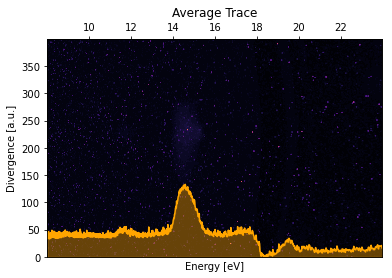

In [33]:
fig, ax = plt.subplots(1)
im, ax, ax2 = bob4.plot_average(ax)
ax.set_title('Average Trace')
ax.xaxis.tick_top()
ax.set_xlabel('Energy [eV]', va = 'top')
ax.set_ylabel('Divergence [a.u.]')


In [ ]:
x, y, Z = Chirp.return_scan_data('thick')
fig, ax = plt.subplots(figsize = (20,10))
vmin=10**3
Z[Z<vmin]=vmin
cma = ax.contourf(y,x,np.log10(Z), levels=50, cmap='ocean_r')
cba = plt.colorbar(cma, ax=ax)
ax.set_ylabel('Glass Thickness [mm]')
ax.set_xlabel('Photon Energy [eV]')
ax.set_xlim(17,24)
print(x)